In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_excel('neurocontroller_model.xlsx', dtype=np.float32)

In [3]:
df.head(5)

,mass_flow(kg/h),Energy_ref,Torque_ref,screw_speed(rpm),solid_content(%),Energy(kJ/kg),Torque(N.m),∆𝒏,∆𝑐_𝑚
0,2.28,6552.149414,2.972,800.0,70.0,6552.149414,2.972000,0.0,0.0
1,2.28,6552.149414,2.972,1000.0,70.0,9031.174805,3.277172,-200.0,0.0
2,2.28,6552.149414,2.972,1200.0,70.0,8612.666016,2.604422,-400.0,0.0
3,2.28,6552.149414,2.972,800.0,72.5,7118.958984,3.229100,0.0,-2.5
4,2.28,6552.149414,2.972,1000.0,72.5,9297.460938,3.373800,-200.0,-2.5


In [4]:
#define inputs and outputs
df = df.sample(frac=1)
X1_data = df[['mass_flow(kg/h)','Energy_ref','Torque_ref','Energy(kJ/kg)','Torque(N.m)']]
Y1_data = df[['∆𝒏']]   #∆𝒏: Screw_speed                     

X_data = X1_data.values
Y_data= Y1_data.values
# normalize data
scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)
from joblib import dump
dump(scaler , "scaler_nc.joblib")
    

['scaler_nc.joblib']

# SKLearnModel

In [5]:
model_Dn_Neurocontroller= GradientBoostingRegressor(n_estimators =2000 , learning_rate = 0.2,max_depth=2)
Dn_Neurocontroller = cross_validate(model_Dn_Neurocontroller,X_data,Y_data.reshape(-1,),cv=10,scoring=('neg_mean_absolute_error'),return_train_score=True)

In [7]:
model_Dn_Neurocontroller.fit(X_data,Y_data.reshape(-1,))
from joblib import dump, load
dump(model_Dn_Neurocontroller,'model_Dn_Neurocontrollerr.h5') 

['model_Dn_Neurocontrollerr.h5']

In [9]:
load("model_Dn_Neurocontroller.h5")

GradientBoostingRegressor(learning_rate=0.2, n_estimators=200)

In [6]:
Dn_Neurocontroller

{'fit_time': array([4.48199868, 3.59200048, 3.20201516, 3.93703675, 3.07702374,
        2.92201614, 3.01200294, 3.1650033 , 3.10498095, 3.29193258]),
 'score_time': array([0.00800204, 0.00499988, 0.00598836, 0.00497842, 0.00597548,
        0.00598383, 0.00501895, 0.00501633, 0.00502014, 0.00699902]),
 'test_score': array([-4.82437778, -5.3874161 , -6.41881362, -7.94963541, -6.16172313,
        -6.98955581, -5.50988139, -5.96836921, -6.15008561, -6.62899859]),
 'train_score': array([-3.26415819, -3.39560446, -3.23054072, -3.73072769, -3.11365715,
        -3.09123114, -3.23161426, -3.33666839, -3.63300167, -3.23924894])}

In [7]:
print("test scores:\n",list(map(abs,Dn_Neurocontroller["test_score"])))
print("mean:  ",abs(np.mean(Dn_Neurocontroller["test_score"])) )
print("\n\n")
print("train scores:\n",list(map(abs,Dn_Neurocontroller["train_score"])))
print("mean:  ",abs(np.mean(Dn_Neurocontroller["train_score"]) ))


test scores:
 [4.824377779383918, 5.387416097740316, 6.418813615737888, 7.949635406860841, 6.161723125382263, 6.989555808599139, 5.509881391603634, 5.968369212671107, 6.150085614667466, 6.628998591638668]
mean:   6.198885664428524



train scores:
 [3.2641581867169367, 3.39560446109949, 3.2305407182318917, 3.7307276901474182, 3.113657152091507, 3.0912311375422665, 3.231614261286296, 3.336668389616115, 3.633001668710598, 3.239248940293769]
mean:   3.326645260573629


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.01)
model_Dn_Neurocontroller= GradientBoostingRegressor( learning_rate=0.2, max_depth=3, n_estimators=200)
model_Dn_Neurocontroller.fit(X_train,y_train)
y_pred=model_Dn_Neurocontroller.predict(X_test)

c:\Users\aminr\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from joblib import dump, load
dump(model_Dn_Neurocontroller,'model_Dn_Neurocontroller.h5') 

['model_Dn_Neurocontroller.h5']

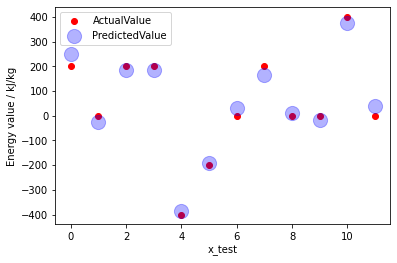

In [10]:
#plots
plt.scatter(list(range(len(y_pred))),y_test, c= ('red'))
plt.scatter(list(range(len(y_pred))),y_pred, c= ('blue'),alpha=0.3,s=200)
plt.xlabel('x_test')
plt.ylabel('Energy value / kJ/kg')
plt.legend(['ActualValue', 'PredictedValue'])
plt.show()